In [1]:
from PIL import Image
import numpy as np
import sys
import os
import scipy
import random
import matplotlib.pyplot as plt
sys.path.append('../scripts')
import image_manipulation as image

# Functions

In [2]:
def flip_image(image, position, plot=False):
    """
    Flips the image horizontal and/or vertical.

    Requires integer input of values between 0 and 3.
        0: no flips
        1: horizontal flip
        2: vertical flip
        3: horizontal & vertical flip.

    Returns:
        None if plot = True
        np.array if plot = False
    """
    
    image = np.fliplr(image) if position in (1,3) else image
    image = np.flipud(image) if position in (2,3) else image

    if plot == True:
        plot_image(image)
    else:
        return image

def grid_with_flips(image, matrix, plot=True):
    """
    Created a grid of images utilising the flip_image() function to flip images utilising the matrix parameter.

    Requires 2d np.array() input with integer values between 0 and 3. see flip_image() function for more information.

    Returns:
        None if plot = True
        np.array if plot = False
    """
    image_list = [flip_image(image.copy(), col) for row in matrix for col in row]
    
    # Create a grid of 3d images, (5 dimensional array)
    grid = np.array(image_list).reshape(matrix.shape[0], matrix.shape[1], *image.shape)
    # Transform the 5d array back to 3d shape with concatenate
    concatenated_array = np.concatenate(np.concatenate(grid, axis=1), axis=1)

    if plot:
        plot_image(concatenated_array)
    else:
        return concatenated_array
    
def blur_image(image, kernel_size, plot=False):
    """
    Applies a blur to the image

    Requires integer input.

    Returns:
        None if plot = True
        np.array if plot = False
    """
    # Create a kernel of ones with the desired size
    kernel = np.ones((kernel_size, kernel_size))

    # Normalize the kernel (make the sum of all elements equal to 1)
    kernel /= kernel.size
    #print(kernel)
    
    # Initialize the output (blurred) image
    blurred_image = np.zeros_like(image)
    #print(blurred_image.shape)
    
    # Apply the kernel to each pixel in each color channel
    for channel in range(image.shape[2]):
        # Pad the image with zero on the border for edge cases
        padded_image = np.pad(image[:, :, channel], kernel_size // 2)

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                # Extract the region of interest
                region = padded_image[i:i+kernel_size, j:j+kernel_size]

                # Apply the kernel (element-wise multiplication and sum)
                blurred_image[i, j, channel] = np.sum(region * kernel)

    if plot == True:
        plot_image(blurred_image)
    else:
        return blurred_image
    
def extract_color(image, color, copy=False, plot=False):
    """
    Extracts the red, green, or blue color from the image.

    Requires char input of 'r', 'g', or 'b'.

    Returns:
        None if plot = True
        np.array if plot = False
    """
    colors = {'r': 0, 'g': 1, 'b': 2}

    if copy:
        image = image.copy()

    # Define threshold for white
    white_threshold = 245

    # Create a mask for the specified color channel
    color_channel_mask = image[:, :, colors[color]] > white_threshold

    # Zero out the specified color channel for non-white pixels
    image[np.logical_not(color_channel_mask), colors[color]] = 0

    if plot:
        plot_image(image)
    else:
        return image


def plot_image(image):
    """
    Plots the image on matlibplot.
    """
    plt.imshow(image)
    plt.show()

def create_colorful_big_one(image, colors, plot=True):
    """
    Created a special image with pretty colors.

    Requires 1 dimensional python list of char values of either 'r', 'g', 'b'.

    Returns:
        None if plot = True
        np.array if plot = False
    """
    stretched_image = np.repeat(np.repeat(image, 2, axis=0), 2, axis=1)

    image_list = []
    for color in colors:
        image_list.append(extract_color(image, color, copy=True, plot=False))

    img_arr = np.array(image_list)

    stacked_image = np.hstack((np.concatenate(img_arr[4:6], axis=0), stretched_image))
    stacked_image = np.hstack((stacked_image, np.concatenate(img_arr[10:12], axis=0)))
    stacked_image = np.vstack((np.concatenate(img_arr[0:4], axis=1),stacked_image))
    stacked_image = np.vstack((stacked_image,np.concatenate(img_arr[6:10], axis=1)))

    if plot:
        plot_image(stacked_image)
    else:
        return stacked_image


def grid_flex(image, rows, columns, flips=None, colors=None, plot=True):
    """
    Creates a flexible grid of images able to flip and extract colors of each image.

    Args:
        image (numpy.ndarray): Input image as a numpy array.
        rows (int): Number of rows in the grid.
        columns (int): Number of columns in the grid.
        flips (list): 1-dimensional list containing int values between 0 and 3 for flipping images.
        colors (list): 1-dimensional list containing char values 'r','g','b' for extracting colors.
        plot (bool): If True, plot the resulting image. Default is True.

    Returns:
        numpy.ndarray or None: Resulting image as a numpy array if plot is False, None otherwise.
    """
    image_list = []
    
    for i in range(rows * columns):
        img_copy = image.copy()
        
        if flips:
            img_copy = flip_image(img_copy, flips[i])
        
        if colors:
            img_copy = extract_color(img_copy, colors[i])
        
        image_list.append(img_copy)
    
    # Create a grid of 3D images
    grid = np.array(image_list).reshape(rows, columns, *image.shape)
    
    # Concatenate along rows and columns to form the final image
    concatenated_array = np.concatenate(np.concatenate(grid, axis=1), axis=1)
    
    if plot:
        plot_image(concatenated_array)
    else:
        return concatenated_array

def convert_to_grayscale(image):
    """
    Convert a color image to grayscale.

    Args:
        image (numpy.ndarray): Input image as a numpy array with shape (height, width, 3).

    Returns:
        numpy.ndarray: Grayscale image as a numpy array with shape (height, width).
    """
    # Convert the image to grayscale by taking the weighted average of RGB channels
    grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    return grayscale_image.astype(np.uint8)

def resize_image(image, new_size):
    """
    Resize an image using NumPy.

    Args:
        image (numpy.ndarray): Input image as a numpy array.
        new_size (tuple): Tuple containing the new size (height, width) of the image.

    Returns:
        numpy.ndarray: Resized image as a numpy array.
    """
    # Get the current size of the image
    original_size = image.shape[:2]

    # Calculate the scale factors for resizing
    scale_factors = (new_size[0] / original_size[0], new_size[1] / original_size[1])

    # Resize the image using interpolation
    resized_image = np.zeros(new_size + (image.shape[2],), dtype=image.dtype)
    for i in range(image.shape[2]):  # Iterate over color channels
        for j in range(new_size[0]):  # Iterate over rows
            for k in range(new_size[1]):  # Iterate over columns
                orig_i = int(j / scale_factors[0])
                orig_j = int(k / scale_factors[1])
                resized_image[j, k, i] = image[orig_i, orig_j, i]

    return plot_image(resized_image)

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def plot_edges(image):
    """
    Detects edges in the image using a simple edge detection algorithm and plots them.

    Args:
        image (numpy.ndarray): Input image as a numpy array.
    """
    # Convert the image to grayscale
    gray_image = np.mean(image, axis=-1)

    # Define Sobel filters for edge detection
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Compute gradients using Sobel filters
    gradient_x = np.abs(np.convolve(gray_image.flatten(), sobel_x.flatten(), mode='same').reshape(gray_image.shape))
    gradient_y = np.abs(np.convolve(gray_image.flatten(), sobel_y.flatten(), mode='same').reshape(gray_image.shape))
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Threshold gradient magnitude to detect edges
    threshold = 50
    edges = gradient_magnitude > threshold

    # Invert the edges (to have black lines on white background)
    edges = ~edges

    # Plot the edges
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()

def invert_image(image, plot=True):
    """
    Inverts the colorscheme of the image

    Returns:
        None if plot = True
        np.array if plot = False
    """

    inverted_image = 255 - image

    if plot == True:
        plot_image(inverted_image)
    else:
        return inverted_image


In [3]:
fp = os.path.join('../images/augurk_image.jpg')
np_image = np.array(Image.open(fp), dtype="int32")

Loading the augurk_image.jpg image from the images folder, feel free to replace this image with any other image of your choice


**Initial recreation of the images from the assignment.**

**Image 1: Image tiles (no manipulations)**

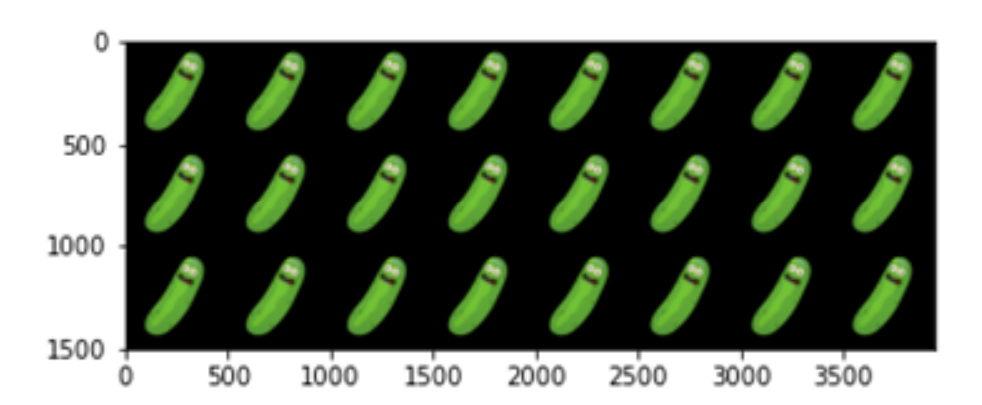

this can be archieved with the utils.grid_flex() function.

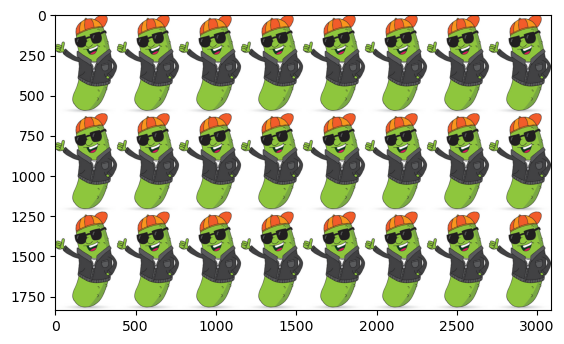

In [4]:
grid_flex(np_image, rows=3, columns=8, plot=True)

**Image 2: Image tiles (with flips)**
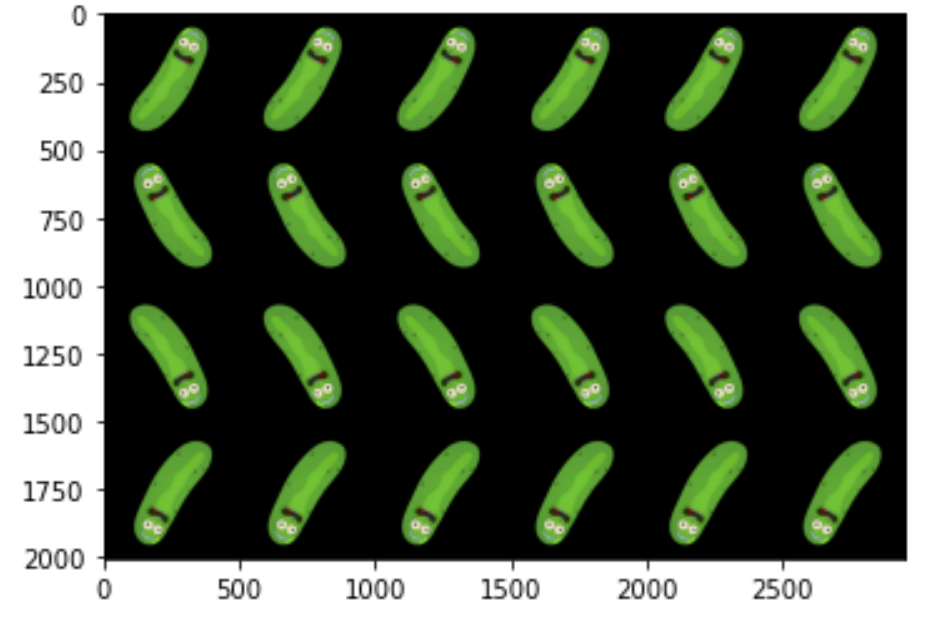
this can be archieved with the grid_with_flips(image, matrix) function.
*matrix needs to be a 2d np.array() containing values between 0 and 3*

    0: No flips
    1: Horizontal flip
    2: Vertical flip
    3: Horizontal & Vertical flip

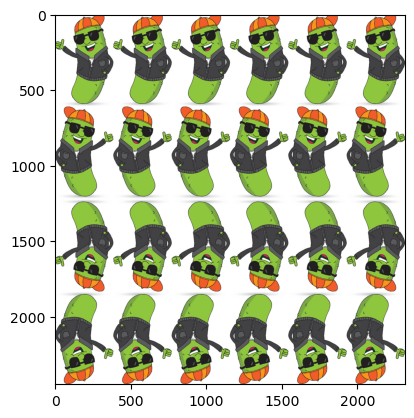

In [5]:
rows = 4
columns = 6

matrix = np.array([[i%4 for y in range(columns)] for i in range(rows)])
grid_with_flips(np_image, matrix, plot=True)

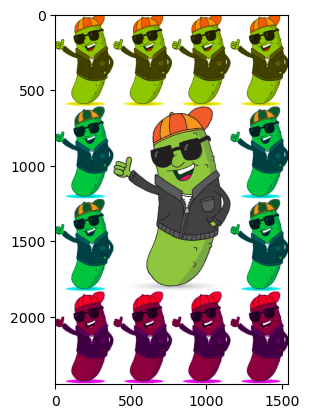

In [6]:
colors = ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r','r']
create_colorful_big_one(np_image, colors)

**Additional assignments**

**1: Utilise flips & colors within the same function**<br>
Utilising the utils.grid_flex() function we can add a list of colors and flips into the same function.<br>
*The function requires 1d python lists as input for colors and flips using the same logic as the functions above*

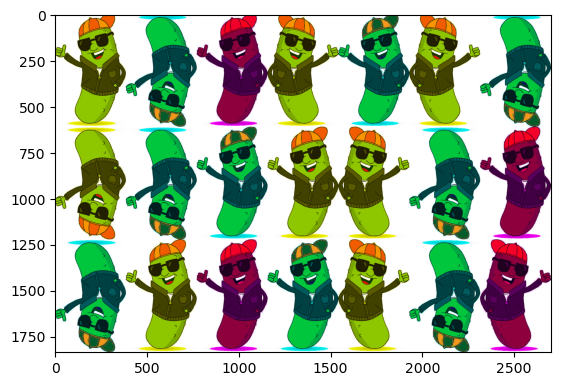

In [7]:
rows = 3
columns = 7

flips = [random.randrange(0,3) for _ in range(rows*columns)]
colors = [random.choice(['r','g','b']) for _ in range(rows*columns)]

grid_flex(np_image, rows, columns, flips=flips, colors=colors, plot=True)

**2: Create two more additional image manipulations**<br>

**1. Blur**<br>
Using the utils.blur_image(image, kernel_size) function we can add a blur to the image,<br>
specify the kernel size by inserting an integer value. *higher value means larger blur*

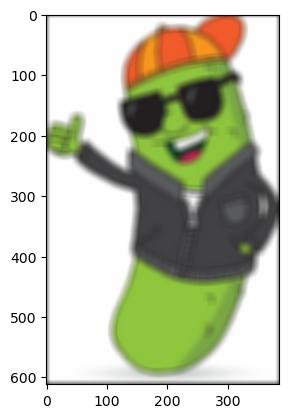

In [8]:
blur_image(np_image, kernel_size=15, plot=True)

**2. Invert**<br>
Utilising the utils.invert_image(image) function, we can invert the colorscheme of the image.<br>
We can also utilise the extract_color(image, color) function in combination with the invert_image() function to get cyan, magenta and yellow colorschemes.

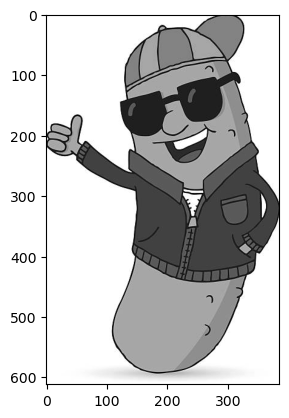

In [9]:
plt.imshow(convert_to_grayscale(np_image), cmap='gray')
plt.axis('on')
plt.show()

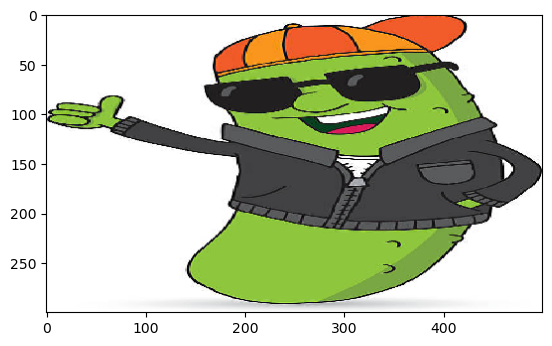

In [10]:
resize_image(np_image, (300,500))

plot_edges(np_image)

**1. Blur**<br>
Using the utils.blur_image(image, kernel_size) function we can add a blur to the image,<br>
specify the kernel size by inserting an integer value. *higher value means larger blur**

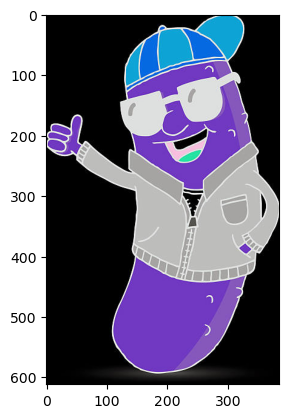

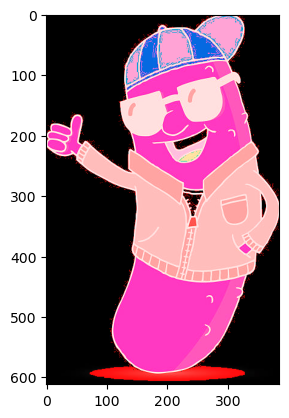

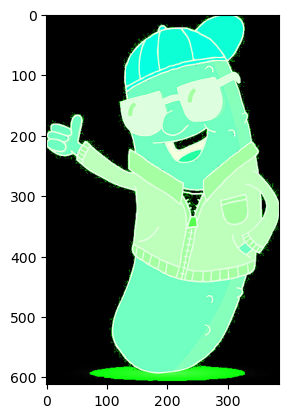

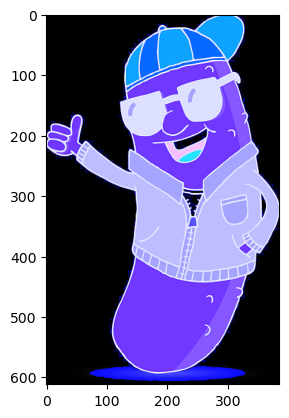

In [11]:
invert_image(np_image)

invert_image(extract_color(np_image, 'r', copy=True, plot=False), plot=True)
invert_image(extract_color(np_image, 'g', copy=True, plot=False), plot=True)
invert_image(extract_color(np_image, 'b', copy=True, plot=False), plot=True)